In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Motion of the protection front

In [2]:
# Define the variables
t = sp.symbols('t', real=True)
F, T, m_a, f = sp.symbols('F T m_a f', positive=True, real=True)
x_a = sp.Function('x_a')(t)
x_a

x_a(t)

In [3]:
# Define the force function F(t)
F_t = sp.Piecewise((F - (F/T)*t, t <= T), (0, t > T))
print(sp.print_latex(F_t))
F_t

\begin{cases} F - \frac{F t}{T} & \text{for}\: T \geq t \\0 & \text{otherwise} \end{cases}
None


Piecewise((F - F*t/T, T >= t), (0, True))

In [4]:
# Define the differential equation for t < T
eq1 = sp.Eq(m_a * x_a.diff(t, t), F_t - f)
eq1

Eq(m_a*Derivative(x_a(t), (t, 2)), -f + Piecewise((F - F*t/T, T >= t), (0, True)))

In [5]:
# Solve the differential equation for t <= T
sol1 = sp.dsolve(eq1, ics={x_a.subs(t, 0): 0, x_a.diff(t).subs(t, 0): 0})

# Extract the position function for t <= T
x_a_sol1 = sol1.rhs
x_a_sol1

Piecewise((F*t**2/(2*m_a) - F*t**3/(6*T*m_a) - f*t**2/(2*m_a), T >= t), (-f*t**2/(2*m_a), True))

In [6]:
# Define the differential equation for t > T
eq2 = sp.Eq(m_a * x_a.diff(t, t), -f)
eq2

Eq(m_a*Derivative(x_a(t), (t, 2)), -f)

In [7]:
# Solve the differential equation for t >= T with continuity conditions
sol2 = sp.dsolve(eq2, ics={x_a.subs(t, T): x_a_sol1.subs(t, T), 
                           x_a.diff(t).subs(t, T): x_a_sol1.diff(t).subs(t, T)})

# Extract the position function for t >= T
x_a_sol2 = sol2.rhs
x_a_sol2

-F*T**2/(6*m_a) + F*T*t/(2*m_a) - f*t**2/(2*m_a)

In [8]:
# Combine the solutions into a piecewise function
x_a_sol = sp.Piecewise((x_a_sol1, t <= T), (x_a_sol2, t > T))

# Display the piecewise solution
print(sp.print_latex(x_a_sol))
x_a_sol

\begin{cases} \frac{F t^{2}}{2 m_{a}} - \frac{F t^{3}}{6 T m_{a}} - \frac{f t^{2}}{2 m_{a}} & \text{for}\: T \geq t \\- \frac{F T^{2}}{6 m_{a}} + \frac{F T t}{2 m_{a}} - \frac{f t^{2}}{2 m_{a}} & \text{otherwise} \end{cases}
None


Piecewise((F*t**2/(2*m_a) - F*t**3/(6*T*m_a) - f*t**2/(2*m_a), T >= t), (-F*T**2/(6*m_a) + F*T*t/(2*m_a) - f*t**2/(2*m_a), True))

In [9]:
# Display the piecewise solution for velocity
v_a_sol = x_a_sol.diff(t)
v_a_sol

Piecewise((F*t/m_a - F*t**2/(2*T*m_a) - f*t/m_a, T >= t), (F*T/(2*m_a) - f*t/m_a, True))

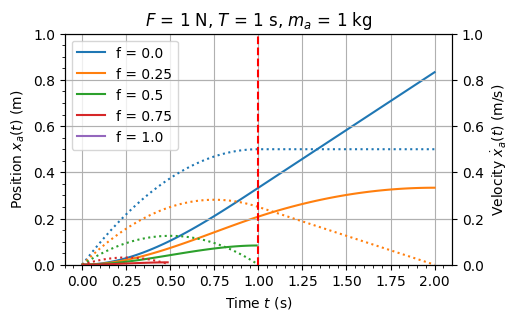

In [10]:
# Define the parameters for plotting
F_val = 1
T_val = 1
m_a_val = 1
f_vals = np.linspace(0, 1, 5)

plt.figure(figsize=(5, 3))
plt.minorticks_on()

ax = plt.gca()
ax_twin = ax.twinx()
for f_val in f_vals:
    # Substitute the parameters into the piecewise function
    x_a_sol_plot = x_a_sol.subs({F: F_val, T: T_val, m_a: m_a_val, f: f_val})
    v_a_sol_plot = v_a_sol.subs({F: F_val, T: T_val, m_a: m_a_val, f: f_val})

    # Create a numerical function for plotting
    x_a_sol_lambdified = sp.lambdify(t, x_a_sol_plot, 'numpy')
    v_a_sol_lambdified = sp.lambdify(t, v_a_sol_plot, 'numpy')

    # Generate time values for plotting
    import numpy as np
    t_vals = np.linspace(0, 2, 100)
    x_a_vals = np.where(v_a_sol_lambdified(t_vals) >= 0, x_a_sol_lambdified(t_vals), np.nan)
    v_a_vals = np.where(v_a_sol_lambdified(t_vals) >= 0, v_a_sol_lambdified(t_vals), np.nan)

    # Plot the piecewise function
    ax.plot(t_vals, x_a_vals, label=f'f = {f_val}')
    ax.set_title(f'$F$ = {F_val} N, $T$ = {T_val} s, $m_a$ = {m_a_val} kg')
    ax.set_xlabel('Time $t$ (s)')
    ax.set_ylabel('Position $x_a(t)$ (m)')
    ax.grid(True)
    
    ax_twin.plot(t_vals, v_a_vals, linestyle=':')
    ax_twin.set_ylabel('Velocity $\dot{x}_a(t)$ (m/s)')
    ax_twin.grid(True)

plt.axvline(x=T_val, color='r', linestyle='--', label='$t = T$')
ax.legend()
ax.set_ylim([0, 1])
ax_twin.set_ylim([0, 1])
plt.show()

## Non dimensionalization

In [11]:
tau, phi, xi_a = sp.symbols('tau, phi, xi_a', positive=True)

In [12]:
xi_a_sol = x_a_sol.subs({
    t: tau*T,
    f: phi*F
})*m_a/(F*(T**2))
xi_a_sol = sp.piecewise_fold(xi_a_sol).simplify().subs({T: 1})
print(sp.print_latex(xi_a_sol.simplify()))
xi_a_sol

\begin{cases} \frac{\tau^{2} \left(- 3 \phi - \tau + 3\right)}{6} & \text{for}\: \tau \leq 1 \\- \frac{\phi \tau^{2}}{2} + \frac{\tau}{2} - \frac{1}{6} & \text{otherwise} \end{cases}
None


Piecewise((tau**2*(-3*phi - tau + 3)/6, tau <= 1), (-phi*tau**2/2 + tau/2 - 1/6, True))

In [13]:
beta_a_sol = xi_a_sol.diff(tau)
print(sp.print_latex(beta_a_sol))
beta_a_sol

\begin{cases} - \frac{\tau^{2}}{6} + \frac{\tau \left(- 3 \phi - \tau + 3\right)}{3} & \text{for}\: \tau \leq 1 \\- \phi \tau + \frac{1}{2} & \text{otherwise} \end{cases}
None


Piecewise((-tau**2/6 + tau*(-3*phi - tau + 3)/3, tau <= 1), (-phi*tau + 1/2, True))

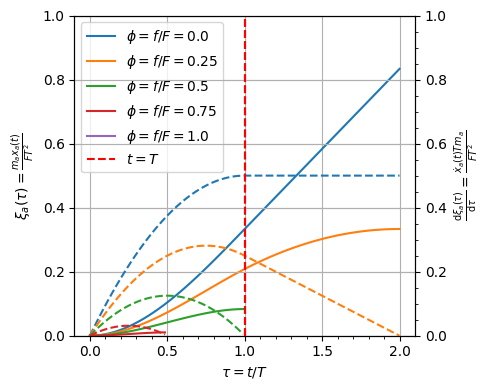

In [14]:
# Define the parameters for plotting
phi_vals = np.linspace(0, 1, 5)


# fig, ax_ = plt.subplots(2, 1, figsize=(6, 6), sharex='col')
# ax = ax_[0]
# ax_twin = ax_[1]

fig, ax_ = plt.subplots(1, 1, figsize=(5, 4), sharex='col')
ax = ax_
ax_twin = ax_.twinx()


for phi_val in phi_vals:
    # Substitute the parameters into the piecewise function
    xi_a_sol_plot = xi_a_sol.subs({phi: phi_val})
    beta_a_sol_plot = beta_a_sol.subs({phi: phi_val})

    # Create a numerical function for plotting
    xi_a_sol_lambdified = sp.lambdify(tau, xi_a_sol_plot, 'numpy')
    beta_a_sol_lambdified = sp.lambdify(tau, beta_a_sol_plot, 'numpy')

    # Generate time values for plotting
    tau_vals = np.linspace(0, 2, 100)
    xi_a_vals = np.where(beta_a_sol_lambdified(tau_vals) >= 0, xi_a_sol_lambdified(tau_vals), np.nan)
    beta_a_vals = np.where(beta_a_sol_lambdified(tau_vals) >= 0, beta_a_sol_lambdified(tau_vals), np.nan)

    # Plot the piecewise function
    ax.plot(tau_vals, xi_a_vals, label=f'$\phi = f/F =${phi_val}')
    ax.set_ylabel(r'$\xi_a(\tau) = \frac{m_a x_a(t)}{F T^2}$')
    ax.grid(True)
    
    ax_twin.plot(tau_vals, beta_a_vals, linestyle='--')
    ax_twin.set_ylabel(r'$\frac{\mathrm{d} \xi_a(\tau)}{\mathrm{d} \tau} = \frac{\dot{x}_a(t) T m_a}{F T^2}$')
    ax_twin.grid(True)

ax.axvline(x=1, color='r', linestyle='--', label='$t = T$')
ax_twin.axvline(x=1, color='r', linestyle='--', label='$t = T$')

# ax.set_title('Displacement and velocity vs time')
ax.legend()
ax.set_ylim([0, 1])
ax_twin.set_ylim([0, 1])

# ax.set_title('Displacement and velocity of protection vs time')
ax.legend()
# ax.set_ylim([0, 1])
# ax_twin.set_ylim([0, 1])


ax.set_xlabel(r'$\tau = t/T$')
plt.minorticks_on()
plt.tight_layout()
plt.savefig('protection.pdf', bbox_inches='tight')
plt.show()

# Calculate final time and displacement

In [15]:
try:
    from IPython.display import display, clear_output, Math, Markdown
except:
    pass


def print_solutions(solutions):
    ''' print the rendered Latex format in Jupyter cell'''
    for set_num, space in enumerate(solutions):
        latex_str = '\\text{Solution }'
        latex_str += f'{sp.latex(space)}'
        display(Math(latex_str))
        display(Markdown('---'))

## Final time

In [16]:
tau_f_sols = sp.solve(beta_a_sol, tau)
print_solutions(tau_f_sols)

combined = [(pw.args[0][0], pw.args[0][1]) for pw in tau_f_sols if pw]
combined.append((sp.oo, True))
tau_f_sol = sp.simplify(sp.Piecewise(*combined))
print(sp.print_latex(tau_f_sol))
tau_f_sol

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

\begin{cases} \frac{1}{2 \phi} & \text{for}\: \phi < \frac{1}{2} \\2 - 2 \phi & \text{otherwise} \end{cases}
None


Piecewise((1/(2*phi), phi < 1/2), (2 - 2*phi, True))

## Final displacement

In [17]:
xi_a_sol

Piecewise((tau**2*(-3*phi - tau + 3)/6, tau <= 1), (-phi*tau**2/2 + tau/2 - 1/6, True))

In [18]:
xi_a_f_sol = sp.piecewise_fold(xi_a_sol.subs({tau: tau_f_sol})).as_expr_set_pairs(domain=sp.Interval(0, 1))
xi_a_f_sol = [(expr.simplify(), cond.as_relational(phi)) for expr, cond in xi_a_f_sol]
xi_a_f_sol = sp.Piecewise(*[(expr, cond) for expr, cond in xi_a_f_sol])
print(sp.print_latex(xi_a_f_sol))
xi_a_f_sol

\begin{cases} \frac{2 \left(1 - \phi\right)^{3}}{3} & \text{for}\: \phi \geq \frac{1}{2} \wedge \phi \leq 1 \\\frac{3 - 4 \phi}{24 \phi} & \text{for}\: \phi < \frac{1}{2} \end{cases}
None


Piecewise((2*(1 - phi)**3/3, (phi >= 1/2) & (phi <= 1)), ((3 - 4*phi)/(24*phi), phi < 1/2))

<lambdifygenerated-21>:2: RuntimeWarning: divide by zero encountered in divide
  return select([less(phi, 1/2),True], [(1/2)/phi,2 - 2*phi], default=nan)
<lambdifygenerated-22>:2: RuntimeWarning: divide by zero encountered in divide
  return select([logical_and.reduce((greater_equal(phi, 1/2),less_equal(phi, 1))),less(phi, 1/2)], [(2/3)*(1 - phi)**3,(1/24)*(3 - 4*phi)/phi], default=nan)


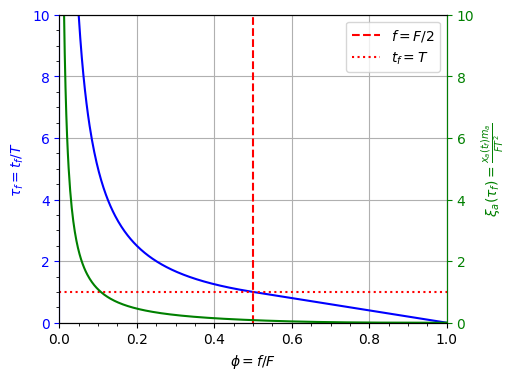

In [19]:
# Substitute the parameters into the piecewise function
tau_f_plot = tau_f_sol
xi_a_f_plot = xi_a_f_sol

# Create a numerical function for plotting
tau_f_sol_lambdified = sp.lambdify(phi, tau_f_plot, 'numpy')
xi_a_f_plot_lambdified = sp.lambdify(phi, xi_a_f_plot, 'numpy')

# Generate time values for plotting
phi_vals = np.linspace(0, 1, 500)
tau_f_vals = tau_f_sol_lambdified(phi_vals)
xi_a_f_vals = xi_a_f_plot_lambdified(phi_vals)

# Plot the piecewise function
fig = plt.figure(figsize=(5, 4))
plt.tight_layout()
plt.minorticks_on()

ax = plt.gca()
ax_twin = ax.twinx()

ax.plot(phi_vals, tau_f_vals, color='blue')  # Left axis plot in blue
ax_twin.plot(phi_vals, xi_a_f_vals, color='green')  # Right axis plot in green
ax.set_xlabel(r'$\phi = f/F$')
ax.set_ylabel(r'$\tau_f = t_f/T$')
ax_twin.set_ylabel(r'$\xi_a(\tau_f) = \frac{x_a(t_f) m_a}{F T^2}$')
ax.grid(True)

# Customize axis colors
ax.spines['left'].set_color('blue')
ax.yaxis.label.set_color('blue')
ax.tick_params(axis='y', colors='blue')

ax_twin.spines['right'].set_color('green')
ax_twin.yaxis.label.set_color('green')
ax_twin.tick_params(axis='y', colors='green')

ax.axvline(x=1/2, color='r', linestyle='--', label=r'$f=F/2$')
ax.axhline(y=1, color='r', linestyle=':', label=r'$t_f=T$')
ax.legend()
ax.set_ylim([0, 10])
ax_twin.set_ylim([0, 10])
ax.set_xlim([0, 1])

fig.savefig('tau_f_xi_a_f.pdf', bbox_inches='tight')
plt.show()


# Motion of the structure

In [20]:
m_s, c_s, k_s, t_f = sp.symbols('m_s c_s k_s t_f', positive=True, real=True)
x_s = sp.Function('x_s', real=True)(t)
x_s

x_s(t)

In [21]:
# Define the differential equation for t <= t_f
eq_s1 = sp.Eq(m_s * x_s.diff(t, t) + x_s*k_s + x_s.diff(t) * c_s, f)
eq_s1

Eq(c_s*Derivative(x_s(t), t) + k_s*x_s(t) + m_s*Derivative(x_s(t), (t, 2)), f)

In [22]:
# Solve the differential equation for t <= t_f

sol_s1 = sp.dsolve(eq_s1, ics={x_s.subs(t, 0): 0, x_s.diff(t).subs(t, 0): 0})

# Extract the position function for t < T
x_s_sol1 = sp.simplify(sol_s1.rhs)
x_s_sol1

f*((c_s - sqrt(c_s**2 - 4*k_s*m_s))*sqrt(c_s**2 - 4*k_s*m_s)*exp(t*(c_s - sqrt(c_s**2 - 4*k_s*m_s))/(2*m_s)) - (c_s + sqrt(c_s**2 - 4*k_s*m_s))*sqrt(c_s**2 - 4*k_s*m_s)*exp(t*(c_s + sqrt(c_s**2 - 4*k_s*m_s))/(2*m_s)) + 2*(c_s**2 - 4*k_s*m_s)*exp(c_s*t/m_s))*exp(-c_s*t/m_s)/(2*k_s*(c_s**2 - 4*k_s*m_s))

## Non dimensionalization

In [23]:
tau_s, omega_s, zeta_s, phi_s, tau_s_f = sp.symbols('tau_s, omega_s, zeta_s, phi_s, tau_s_f', positive=True, real=True)

In [24]:
xi_s_sol = x_s_sol1.subs({
    t: tau_s/omega_s,
    t_f: tau_s_f/omega_s,
    m_s: k_s/(omega_s**2),
    c_s: zeta_s*(2*m_s*omega_s)
})/(f/k_s)

xi_s_sol = xi_s_sol.simplify()
xi_s_sol

((zeta_s - sqrt(zeta_s**2 - 1))*sqrt(zeta_s**2 - 1)*exp(tau_s*(zeta_s - sqrt(zeta_s**2 - 1))) - (zeta_s + sqrt(zeta_s**2 - 1))*sqrt(zeta_s**2 - 1)*exp(tau_s*(zeta_s + sqrt(zeta_s**2 - 1))) + 2*(zeta_s**2 - 1)*exp(2*tau_s*zeta_s))*exp(-2*tau_s*zeta_s)/(2*(zeta_s**2 - 1))

In [25]:
omega_sd = sp.symbols('omega_sd', real=True, positive=True)


xi_s_sol_simp = sp.simplify(sp.simplify(sp.re(xi_s_sol.subs({
    sp.sqrt(zeta_s**2 - 1): omega_sd/(sp.sqrt(-1)*omega_s)}))).subs({omega_s**2 * (1 - zeta_s**2): omega_sd**2}))
sp.print_latex(xi_s_sol_simp)
xi_s_sol_simp

- \frac{\omega_{s} \zeta_{s} e^{- \tau_{s} \zeta_{s}} \sin{\left(\frac{\omega_{sd} \tau_{s}}{\omega_{s}} \right)}}{\omega_{sd}} + 1 - e^{- \tau_{s} \zeta_{s}} \cos{\left(\frac{\omega_{sd} \tau_{s}}{\omega_{s}} \right)}


-omega_s*zeta_s*exp(-tau_s*zeta_s)*sin(omega_sd*tau_s/omega_s)/omega_sd + 1 - exp(-tau_s*zeta_s)*cos(omega_sd*tau_s/omega_s)

In [26]:
beta_s_sol = xi_s_sol.diff(tau_s).simplify()
beta_s_sol

(exp(2*tau_s*sqrt(zeta_s**2 - 1)) - 1)*exp(-tau_s*(zeta_s + sqrt(zeta_s**2 - 1)))/(2*sqrt(zeta_s**2 - 1))

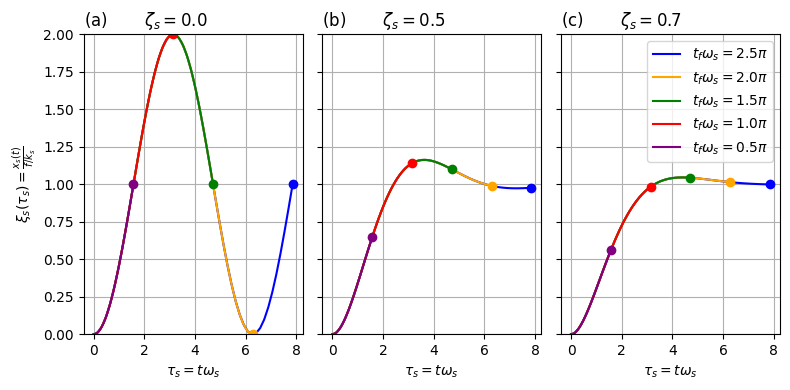

In [27]:
def plot_structure_responses(tau_s_f_vals=None):
    zeta_s_vals = [.0, 0.5, .7]

    fig, ax_ = plt.subplots(1,len(zeta_s_vals), figsize=(8, 4), sharex='col', sharey='row')
    ax = ax_#[0, :]
    # ax_twin = ax_[1, :]

    tau_s_f_vals = (np.linspace(np.pi/2, (10/4)*np.pi, 5) if tau_s_f_vals is None else tau_s_f_vals)[::-1]
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    for i_zeta_s, zeta_s_val in enumerate(zeta_s_vals):
        ax[i_zeta_s].set_title(f"({chr(ord('a')+i_zeta_s)})       $\zeta_s = {zeta_s_val}$", loc='left')
        for i_tau_s_f, tau_s_f_val in enumerate(tau_s_f_vals):
            # Substitute the parameters into the piecewise function
            xi_s_sol_plot = (xi_s_sol.subs({zeta_s: zeta_s_val}))
            beta_s_sol_plot = (beta_s_sol.subs({zeta_s: zeta_s_val}))

            # Create a numerical function for plotting
            xi_s_sol_lambdified = sp.lambdify(tau_s, xi_s_sol_plot, 'numpy')
            beta_s_sol_lambdified = sp.lambdify(tau_s, beta_s_sol_plot, 'numpy')

            # Generate time values for plotting
            tau_s_vals = np.linspace(0, tau_s_f_val, 50)
            xi_s_vals = xi_s_sol_lambdified(tau_s_vals)  
            beta_s_vals = beta_s_sol_lambdified(tau_s_vals)  

            # Plot the piecewise function
            ax[i_zeta_s].plot(tau_s_vals, np.real(xi_s_vals), linestyle='-', color=colors[i_tau_s_f], label=f'$t_f \omega_s ={tau_s_f_val/np.pi}\pi$')
            ax[i_zeta_s].plot(tau_s_vals[-1], np.real(xi_s_vals[-1]), linestyle='none', color=colors[i_tau_s_f], marker='o')
            # ax[i_zeta_s].plot(tau_s_vals, np.imag(xi_s_vals), color=colors[i_tau_s_f], linestyle=':')
            # ax_twin[i_zeta_s].set_xlabel(r'$\tau_s = t \omega_s$')
            ax[i_zeta_s].set_xlabel(r'$\tau_s = t \omega_s$')
            if i_zeta_s == 0:
                ax[i_zeta_s].set_ylabel(r'$\xi_s(\tau_s) = \frac{x_s(t)}{f/k_s}$')
            ax[i_zeta_s].grid(True)
            
            # ax_twin[i_zeta_s].plot(tau_s_vals, beta_s_vals, linestyle=':', label=f'$t_f \omega_s ={tau_s_f_val/np.pi}\pi$',
            #                        color=colors[i_tau_s_f])
            # if i_zeta_s == 0:
            #     ax_twin[i_zeta_s].set_ylabel(r'$\frac{\mathrm{d}\xi_s(\tau_s)}{\mathrm{d}\tau_s} = \frac{\dot{x}_s(t)}{\omega_s f/k_s}$')
            # ax_twin[i_zeta_s].grid(True)

    # fig.suptitle(f'Displacement and velocity of the structure')
    # ax[i_zeta_s].axvline(x=np.pi, linestyle='--', color='red')
    # ax_twin[i_zeta_s].axvline(x=np.pi, linestyle='--', color='red', label='$t=T_s/2$')
    ax[i_zeta_s].set_ylim([0, 2])
    # ax_twin[i_zeta_s].set_ylim([-2, 2])
    ax[i_zeta_s].legend()

    plt.tight_layout()
    plt.show()
    return fig

fig = plot_structure_responses()
fig.savefig(f'structure_response.pdf', bbox_inches='tight')

## Displacement in the structure at $\tau_f$

In [28]:
def xi_s_sol_lambdified(zeta_s_val):
    xi_s_sol_sub = xi_s_sol.subs({zeta_s: zeta_s_val})
    xi_s_calc = sp.lambdify(tau_s, sp.re(xi_s_sol_sub))
    return xi_s_calc


def xi_s_max_lambdified(zeta_s_val: float, tau_s_f_val: float, tol_tau_s: float = 1e-3):
    tau_s_vals = np.arange(tol_tau_s, tau_s_f_val, tol_tau_s)
    
    xi_s_sol_lambdified_ = xi_s_sol_lambdified(zeta_s_val)
    xi_s_vals = xi_s_sol_lambdified_(tau_s_vals)

    return xi_s_vals[-1]


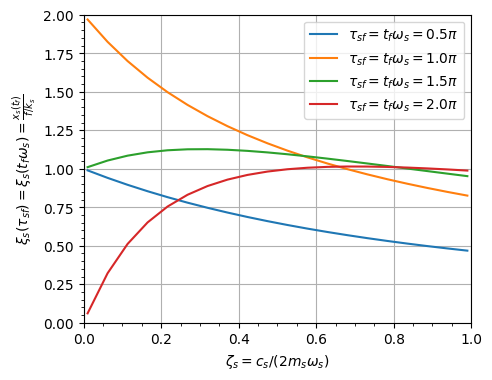

In [29]:

def plot_structure_max_displacement():
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    zeta_s_values = np.linspace(.01, .99, 20)
    tau_s_f_values = np.linspace(.5*np.pi, 2.*np.pi, 4)
    plt.minorticks_on()
    for tau_s_f_val in tau_s_f_values:
        xi_s_max_values = []
        for zeta_s_val in zeta_s_values:
            xi_s_max_values.append(xi_s_max_lambdified(zeta_s_val, tau_s_f_val))
        ax.plot(zeta_s_values, xi_s_max_values, linestyle='-',
                label=r'$\tau_{sf} = t_f \omega_s = $' + f'{tau_s_f_val/np.pi}' + r'$\pi$')

    ax.set_xlim([0,1])
    ax.set_ylim([0,2])
    ax.set_xlabel(r'$\zeta_s = c_s / (2 m_s \omega_s)$')
    ax.set_ylabel(r'$\xi_s(\tau_{sf}) = \xi_s(t_f \omega_s) = \frac{x_s(t_f)} {f/k_s}$')
    ax.legend(loc='upper right')
    plt.grid(True)
    plt.show()
    return fig

fig = plot_structure_max_displacement()
fig.savefig('structure_final_displacement.pdf', bbox_inches='tight')

# Optimization of $f$

## Solve $\xi_{af}$ for $\phi$

In [30]:
xi_a_f = sp.symbols('xi_a_f', real=True, positive=True)

In [31]:
xi_a_eq = sp.Eq(xi_a_f, xi_a_f_sol)
xi_a_eq

Eq(xi_a_f, Piecewise((2*(1 - phi)**3/3, (phi >= 1/2) & (phi <= 1)), ((3 - 4*phi)/(24*phi), phi < 1/2)))

In [32]:
phi_sols = sp.solve(xi_a_eq, phi)
print_solutions(phi_sols)

combined = []
for pw in phi_sols:
    if pw:
        expr, cond = pw.args[0]
        simplified_expr = expr.simplify()
        if isinstance(cond, sp.And):
            collected_cond = sp.And(*[c.collect(xi_a_f) if hasattr(c, 'collect') else c for c in cond.args])
        else:
            collected_cond = cond.collect(xi_a_f) if hasattr(cond, 'collect') else cond
        combined.append((simplified_expr, collected_cond))
# combined.append((0, True))
phi_sol = sp.Piecewise(*combined).simplify()
phi_sol

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

Piecewise((3/(4*(6*xi_a_f + 1)), 1/(6*xi_a_f + 1) < 2/3), (-2**(2/3)*3**(1/3)*xi_a_f**(1/3)/2 + 1, 2**(2/3)*3**(1/3)*xi_a_f**(1/3) <= 1))

In [33]:
phi_sol_set_pairs = phi_sol.as_expr_set_pairs()
phi_sol = sp.Piecewise(*[(expr.simplify(), cond) for expr, cond in 
                            [(expr.simplify(), cond.as_relational(xi_a_f)) for expr, cond in phi_sol_set_pairs]])
print(sp.print_latex(phi_sol))
phi_sol

\begin{cases} \frac{3}{4 \cdot \left(6 \xi_{a f} + 1\right)} & \text{for}\: \xi_{a f} > \frac{1}{12} \\- \frac{2^{\frac{2}{3}} \cdot \sqrt[3]{3} \sqrt[3]{\xi_{a f}}}{2} + 1 & \text{otherwise} \end{cases}
None


Piecewise((3/(4*(6*xi_a_f + 1)), xi_a_f > 1/12), (-2**(2/3)*3**(1/3)*xi_a_f**(1/3)/2 + 1, True))

## $\tau_f$ as a function of $\xi_{af}$ 

In [34]:
tau_f_sol

Piecewise((1/(2*phi), phi < 1/2), (2 - 2*phi, True))

In [35]:
tau_f = sp.piecewise_exclusive(sp.piecewise_fold(tau_f_sol.subs({phi: phi_sol}))).simplify()
tau_f = sp.Piecewise(*[(expr.simplify(), cond) for expr, cond in 
                            [(expr.simplify(), cond.as_relational(xi_a_f)) for expr, cond in tau_f.as_expr_set_pairs()]])
print(sp.print_latex(tau_f))
tau_f

\begin{cases} 4 \xi_{a f} + \frac{2}{3} & \text{for}\: \xi_{a f} > \frac{1}{12} \\2^{\frac{2}{3}} \cdot \sqrt[3]{3} \sqrt[3]{\xi_{a f}} & \text{otherwise} \end{cases}
None


Piecewise((4*xi_a_f + 2/3, xi_a_f > 1/12), (2**(2/3)*3**(1/3)*xi_a_f**(1/3), True))

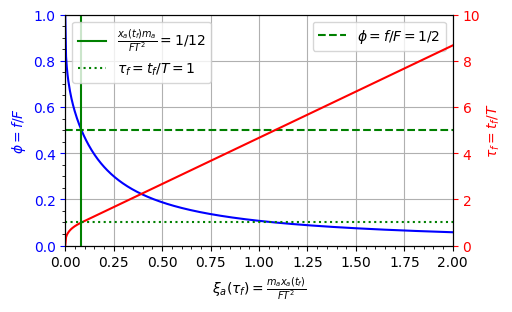

In [36]:

fig = plt.figure(figsize=(5, 3))
plt.tight_layout()

plt.minorticks_on()

ax = plt.gca()
ax_twin = plt.twinx(ax)

# Substitute the parameters into the piecewise function
phi_sol_plot = phi_sol
tau_f_plot = tau_f

# Create a numerical function for plotting
phi_sol_lambdified = sp.lambdify(xi_a_f, phi_sol_plot, 'numpy')
tau_f_lambdified = sp.lambdify(xi_a_f, tau_f_plot, 'numpy')

# Generate time values for plotting
xi_a_f_vals = np.linspace(0, 2, 500)
phi_vals = phi_sol_lambdified(xi_a_f_vals)
tau_f_vals = tau_f_lambdified(xi_a_f_vals)

# Plot the piecewise function
ax.plot(xi_a_f_vals, phi_vals, color='blue')  # Left axis plot in blue
ax_twin.plot(xi_a_f_vals, tau_f_vals, color='red')  # Right axis plot in red
ax.set_ylabel(r'$\phi = f/F$')
ax_twin.set_ylabel(r'$\tau_f = t_f/T$')
ax.set_xlabel(r'$\xi_a(\tau_f) = \frac{m_a x_{a}(t_f)}{F T^2}$')
ax.grid(True)

ax.set_xlim([0, 2])
ax.set_ylim([0, 1])
ax_twin.set_ylim([0, 10])

# Guide lines
ax_twin.axvline(x=1/12, color='g', linestyle='-', label=r'$\frac{x_{a}(t_f) m_a}{F T^2}=1/12$')
ax.axhline(y=1/2, color='g', linestyle='--', label=r'$\phi = f / F = 1/2$')
ax_twin.axhline(y=1, color='g', linestyle=':', label=r'$\tau_f = t_f / T = 1$')

ax.legend(loc='upper right')
ax_twin.legend(loc='upper left')

# Customize axis colors
ax.yaxis.label.set_color('blue')
ax.tick_params(axis='y', colors='blue')
ax_twin.yaxis.label.set_color('red')
ax_twin.tick_params(axis='y', colors='red')
plt.show()

fig.savefig('phi_opt.pdf', bbox_inches='tight')

## Optimum $f$ assuming $\xi_s(t)=0$

In [37]:
from typing import Tuple


def f_t_f_opt(F: float, T: float, m_a: float, x_a_f: float) -> Tuple[float, float]:
    xi_a_f = x_a_f*m_a/(F * (T**2))
    f = F * phi_sol_lambdified(xi_a_f)
    t_f = T*tau_f_lambdified(xi_a_f)
    return (f, t_f)

## Optimum $f$ assuming $$t_f = \arg\max_{t} (x_a(t) - x_s(t)): \dot{x}_a(t_f) = 0$$

In [38]:
def x_s_max(m_s_: float, c_s_: float, k_s_: float, t_f_: float, f_: float) -> float:
    omega_s_ = np.sqrt(k_s_/m_s_)
    zeta_s_val = c_s_/(2*omega_s_*m_s_)
    tau_s_f_val = t_f_ * omega_s_
    xi_s_max = xi_s_max_lambdified(zeta_s_val, tau_s_f_val)
    return xi_s_max*(f_/k_s_)

## Iterative approximation of optimum $f$

In [39]:
def iter_opt(n_iter: int, k_s_: float, c_s_: float, m_s_: float, F_: float, T_: float, m_a_: float, d_c_: float, x_s_f_: float = 1e-6, 
             f_: float = 1e-6, verbose: bool = True):
    t_f_ = 10*T_
    x_s_f_list, x_a_f_list, t_f_list, f_list = [], [], [], []
    for i in range(n_iter):
        x_a_f_ = d_c_ + x_s_f_
        x_s_max_ = x_s_max(m_s_, c_s_, k_s_, t_f_, f_)
        if verbose:
            print(f'{x_s_f_=:4f}, {x_a_f_=:4f}, {(x_a_f_-x_s_f_)=:4f}, {t_f_=:4f}, {f_=:4f}, {x_s_max_=:4f}')
        f_, t_f_ = f_t_f_opt(F=F_, T=T_, m_a=m_a_, x_a_f=x_a_f_)
        x_s_f_ = x_s_max(m_s_, c_s_, k_s_, t_f_, f_)
        x_s_f_list.append(x_s_f_)
        x_a_f_list.append(x_a_f_)
        t_f_list.append(t_f_)
        f_list.append(f_)
    return x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_


In [40]:
class IterOptResults:
    def __init__(self, x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_):
        self.x_s_f_list = x_s_f_list
        self.x_a_f_list = x_a_f_list
        self.t_f_list = t_f_list
        self.f_list = f_list
        self.x_s_max_ = x_s_max_

    def plot(self, d_c_):
        fig, ax = plt.subplots(2, 1, figsize=(6,6), sharex='col')
        plt.minorticks_on()

        ax[0].plot(self.x_a_f_list, label=r'$x_{af}$')
        ax[0].plot(self.x_s_f_list, label=r'$x_{sf}$')
        ax[0].plot(np.array(self.x_a_f_list) - np.array(self.x_s_f_list), label=r'$x_{af} - x_{sf}$')
        ax[0].axhline(y=d_c_, color='black', linestyle='--', label=r'$d_c$')
        ax[0].set_ylabel('displacements (m)')
        ax[0].legend()
        ax[0].grid()

        ax[1].plot(self.t_f_list, label=r'$t_f$', color='b')
        ax[1].set_ylabel(r'$t_f$ (s)')
        ax[1].yaxis.label.set_color('blue')
        ax[1].tick_params(axis='y', colors='blue')
        ax[1].set_ylim([0, 1.1*max(self.t_f_list)])
        ax[1].grid()

        ax_twin = plt.twinx(ax[1])
        ax_twin.plot(self.f_list, label=r'$f$', color='r')
        ax_twin.set_ylabel(r'$f$ (N)')
        ax_twin.yaxis.label.set_color('red')
        ax_twin.tick_params(axis='y', colors='red')
        ax_twin.set_ylim([0, 1.1*max(self.f_list)])
        ax[1].set_xlabel('iteration')
        plt.show()

class FullIter:
    def __init__(self, k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf, iter_opt_results, f_eq_):
        self.k_s_ = k_s_
        self.m_s_ = m_s_
        self.c_s_ = c_s_
        self.brick_area = brick_area
        self.F_ = F_
        self.T_ = T_
        self.m_a_ = m_a_
        self.d_c_ = d_c_
        self.x_s_max_hf = x_s_max_hf
        self.iter_opt_results = iter_opt_results
        self.f_eq_ = f_eq_


# Hypothesis: Energy-based transformation formulas

In [41]:
from typing import List


def convergence_analysis(full_iters: List[FullIter]):
    m_s_iters, omega_s_iters, period_s_iters, zeta_s_iters, x_s_max_hf_iters = [], [], [], [], []
    x_s_max_iters, f_iters, f_eq_iters = [], [], []
    
    for full_iter in full_iters:
        omega_rad_s = np.sqrt(full_iter.k_s_/full_iter.m_s_)
        m_s_iters.append(full_iter.m_s_)
        omega_s_iters.append(omega_rad_s)
        period_s_iters.append(1/(omega_rad_s/(2*np.pi)))
        zeta_s_iters.append((full_iter.c_s_)/(2*(full_iter.m_s_)*omega_rad_s))
        x_s_max_iters.append(full_iter.iter_opt_results.x_s_max_)
        f_iters.append(full_iter.iter_opt_results.f_list[-1])
        f_eq_iters.append(full_iter.f_eq_)
        x_s_max_hf_iters.append(full_iter.x_s_max_hf)

    m_s_iters = np.array(m_s_iters)
    omega_s_iters = np.array(omega_s_iters)
    period_s_iters = np.array(period_s_iters)
    zeta_s_iters = np.array(zeta_s_iters)
    x_s_max_iters = np.array(x_s_max_iters)
    f_iters = np.array(f_iters)
    f_eq_iters = np.array(f_eq_iters)

    fig, ax = plt.subplots(3, 1, sharex='col', figsize=(7,7))
    ax[0].plot(m_s_iters/m_s_iters[0], marker='o', label=f'$m_s / ${np.round(m_s_iters[0])} kg')
    ax[0].plot(period_s_iters/period_s_iters[0], marker='o', label=f'$T_s / ${np.round(1e3*period_s_iters[0])} ms')
    ax[0].plot(zeta_s_iters, marker='o', label=r'$\zeta_s$')
    ax[0].set_ylabel('structure \nparameters (adim.)')
    ax[0].legend()

    ax[1].plot(x_s_max_hf_iters, marker='o', label=r'$\max_{t}{\left|x_s(t)\right|}$ this iteration' + '\n' + '(high fidelity simulation)')
    ax[1].plot(x_s_max_iters, marker='o', label=r'$\max_{t}{\left|x_s(t)\right|}$ prediction next iter.' + '\n' '(simplified analysis)')
    ax[1].set_ylabel('structure \ndisplacement (m)')
    ax[1].legend()

    ax[2].plot(f_eq_iters, marker='o', label=r'$f_\mathrm{eq}$')
    ax[2].plot(f_iters, marker='o', label=r'$f$')
    ax[2].set_ylabel('yield force (N)')
    ax[2].legend()

    ax[-1].set_xticks(range(len(m_s_iters)), range(len(m_s_iters)))
    ax[-1].set_xlabel('full iteration')
    plt.show()

## 1.6 mm, 12.6 kg

In [42]:
full_iters_mean_press = []

### full_iter = 0

m_a_=12.660480000000002 kg
Loading: F_=1753384.957032 N, T_=0.000265 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000800 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.002647, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.021628, x_a_f_=0.121628, (x_a_f_-x_s_f_)=0.100000, t_f_=0.011088, f_=20929.412340, x_s_max_=0.021628
x_s_f_=0.019280, x_a_f_=0.119280, (x_a_f_-x_s_f_)=0.100000, t_f_=0.013448, f_=17256.795362, x_s_max_=0.019280
x_s_f_=0.019564, x_a_f_=0.119564, (x_a_f_-x_s_f_)=0.100000, t_f_=0.013191, f_=17591.863429, x_s_max_=0.019564
x_s_f_=0.019529, x_a_f_=0.119529, (x_a_f_-x_s_f_)=0.100000, t_f_=0.013222, f_=17550.677601, x_s_max_=0.019529
f_eq_=17555.695523898838


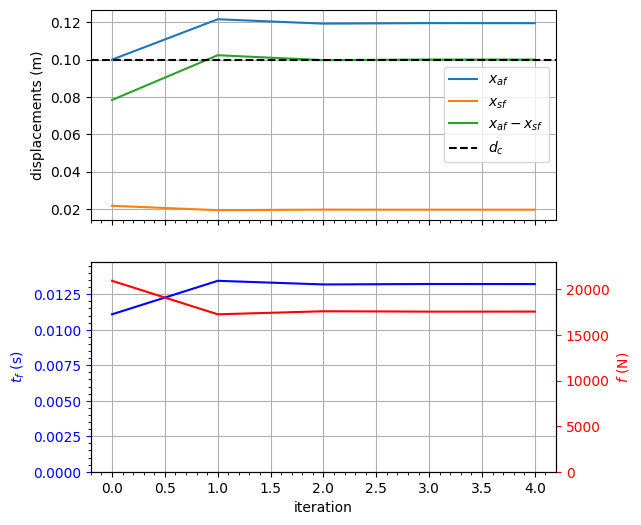

In [43]:
n_iter = 5

k_s_ = 1042199.4336   # N/m
m_s_ = 18.4025  # kg
c_s_ = 4206.8071  # Ns/m


brick_area = 0.84*0.30
F_ = 1753384.9570321564

T_ = 0.00026470203578144846

x_s_max_hf = 0.030513471603

m_a_ = 2 * brick_area * 0.0032 * 7850
print(f'{m_a_=} kg')

d_c_ = 0.10

phi_eq = 1.0

# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') # assume no cohesion for structure alone


# Call interative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))

full_iters_mean_press[-1].iter_opt_results.plot(d_c_)

### full_iter = 1

7.814638964446855
Loading: F_=4039486.814021 N, T_=0.000132 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000429 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.001321, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.024784, x_a_f_=0.124784, (x_a_f_-x_s_f_)=0.100000, t_f_=0.005948, f_=44848.323058, x_s_max_=0.024784
x_s_f_=0.026855, x_a_f_=0.126855, (x_a_f_-x_s_f_)=0.100000, t_f_=0.007400, f_=36047.096343, x_s_max_=0.026855
x_s_f_=0.026974, x_a_f_=0.126974, (x_a_f_-x_s_f_)=0.100000, t_f_=0.007521, f_=35465.555733, x_s_max_=0.026974
x_s_f_=0.026975, x_a_f_=0.126975, (x_a_f_-x_s_f_)=0.100000, t_f_=0.007528, f_=35432.735826, x_s_max_=0.026975
f_eq_=64347.251983464295


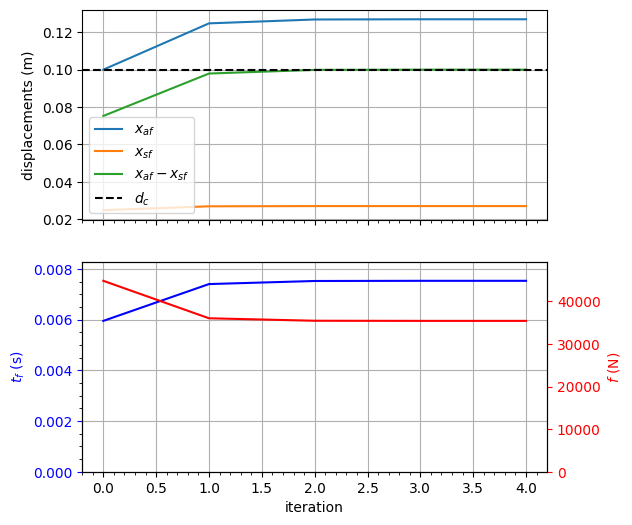

In [44]:
n_iter = 5

m_s_ = 18.3264  # kg
k_s_ = 565860.4316 # N/m
c_s_ = 5040.3843  # Ns/m


brick_area = 0.84*0.3

T_ = 0.000132064794866192  # s
F_ = 4039486.8140211073  # N

x_s_max_hf = 0.034374271406638575  # m

m_a_ = 7.814638964446855  # kg
print(m_a_)

d_c_ = 0.10

phi_eq = 1.8160572668770114 

# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') 

# Call iterative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))
full_iters_mean_press[-1].iter_opt_results.plot(d_c_)



### full_iter = 2

7.766926161224443
Loading: F_=3978052.684634 N, T_=0.000127 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000266 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.001274, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.010601, x_a_f_=0.110601, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006214, f_=40792.429950, x_s_max_=0.010601
x_s_f_=0.010636, x_a_f_=0.110636, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006863, f_=36931.373015, x_s_max_=0.010636
x_s_f_=0.010638, x_a_f_=0.110638, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006865, f_=36919.723369, x_s_max_=0.010638
x_s_f_=0.010638, x_a_f_=0.110638, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006865, f_=36918.965255, x_s_max_=0.010638
f_eq_=74744.92535187532


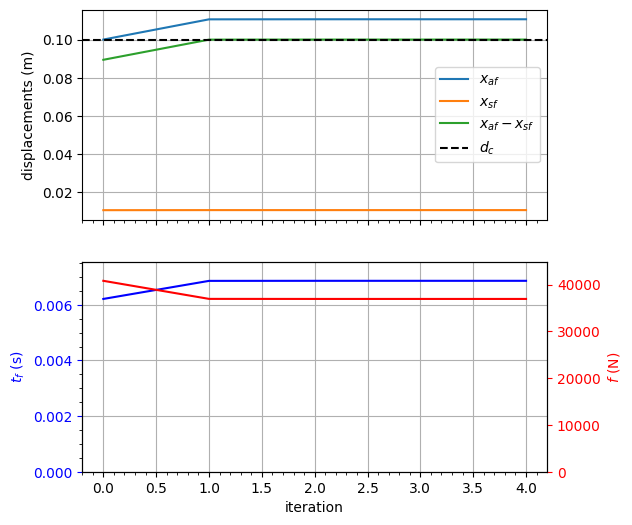

In [45]:
n_iter = 5


m_s_ = 29.0013  # kg
k_s_ = 2136933.6376 # N/m
c_s_ = 13182.8737  # Ns/m


brick_area = 0.84*0.3

T_ = 0.00012743256911329948  # s
F_ = 3978052.684634044  # N

x_s_max_hf = 0.015741078223651832

m_a_ = 7.766926161224443  # kg

print(m_a_)

d_c_ = 0.10

phi_eq = 2.0245632314432243 


# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') 

# Call iterative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))
full_iters_mean_press[-1].iter_opt_results.plot(d_c_)

### full_iter = 3

7.673278142233976
Loading: F_=3894709.004586 N, T_=0.000125 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000196 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.001255, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.009247, x_a_f_=0.109247, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006364, f_=38400.693823, x_s_max_=0.009247
x_s_f_=0.009319, x_a_f_=0.109319, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006944, f_=35189.917992, x_s_max_=0.009319
x_s_f_=0.009318, x_a_f_=0.109318, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006949, f_=35167.103077, x_s_max_=0.009318
x_s_f_=0.009318, x_a_f_=0.109318, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006949, f_=35167.255519, x_s_max_=0.009318
f_eq_=73324.80534963075


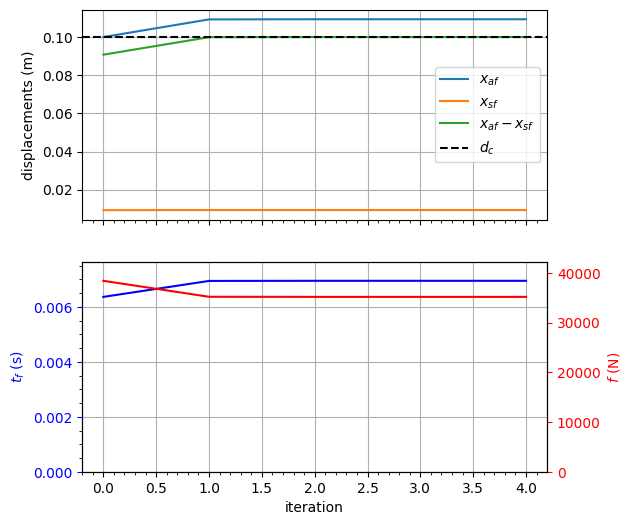

In [46]:
n_iter = 5

m_s_ = 34.6783  # kg
k_s_ = 2214010.5351 # N/m
c_s_ = 14344.3782  # Ns/m


brick_area = 0.84*0.3

T_ = 0.00012548903063547222  # s
F_ = 3894709.0045864787  # N

x_s_max_hf = 0.015246217710546513

m_a_ = 7.673278142233976  # kg
print(m_a_)

d_c_ = 0.10

phi_eq = 2.085031403071961 

# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') 

# Call iterative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))
full_iters_mean_press[-1].iter_opt_results.plot(d_c_)

### full_iter = 4

7.673278142233976
Loading: F_=3894709.004586 N, T_=0.000125 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000196 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.001255, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.009247, x_a_f_=0.109247, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006364, f_=38400.693823, x_s_max_=0.009247
x_s_f_=0.009319, x_a_f_=0.109319, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006944, f_=35189.917992, x_s_max_=0.009319
x_s_f_=0.009318, x_a_f_=0.109318, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006949, f_=35167.103077, x_s_max_=0.009318
x_s_f_=0.009318, x_a_f_=0.109318, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006949, f_=35167.255519, x_s_max_=0.009318
f_eq_=73324.80534963075


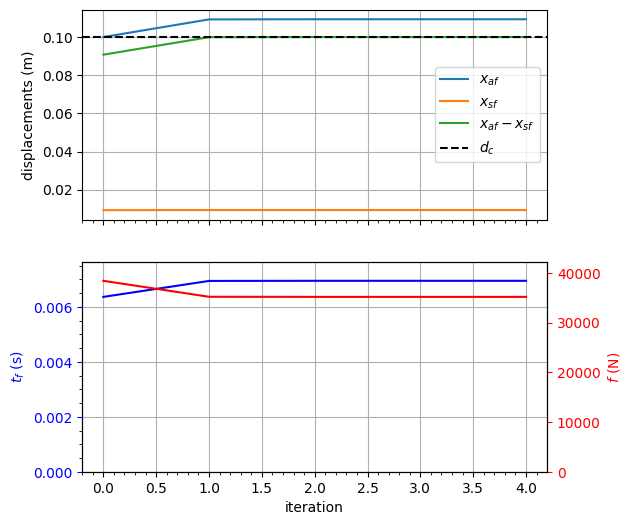

In [47]:
n_iter = 5

m_s_ = 34.6783  # kg
k_s_ = 2214010.5351 # N/m
c_s_ = 14344.3782  # Ns/m


brick_area = 0.84*0.3

T_ = 0.00012548903063547222  # s
F_ = 3894709.0045864787  # N

x_s_max_hf = 0.015246217710546513

m_a_ = 7.673278142233976  # kg
print(m_a_)

d_c_ = 0.10

phi_eq = 2.085031403071961 

# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') 

# Call iterative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))
full_iters_mean_press[-1].iter_opt_results.plot(d_c_)

### Convergence

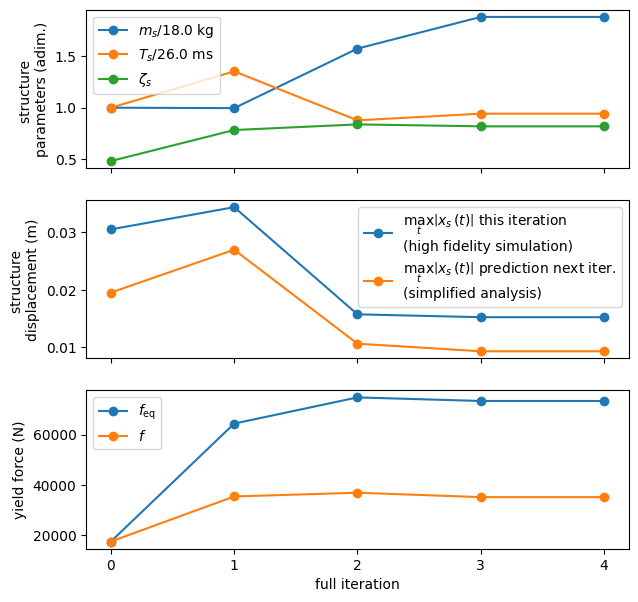

In [48]:
convergence_analysis(full_iters_mean_press)

## 6.2 mm, 12.6 kg

In [49]:
full_iters_mean_press_6mm4_12kg6 = []

### full_iter = 0

m_a_=12.660480000000002 kg
Loading: F_=1753384.957032 N, T_=0.000265 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000800 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.002651, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.021671, x_a_f_=0.121671, (x_a_f_-x_s_f_)=0.100000, t_f_=0.011073, f_=20987.319858, x_s_max_=0.021671
x_s_f_=0.019321, x_a_f_=0.119321, (x_a_f_-x_s_f_)=0.100000, t_f_=0.013434, f_=17298.625864, x_s_max_=0.019321
x_s_f_=0.019604, x_a_f_=0.119604, (x_a_f_-x_s_f_)=0.100000, t_f_=0.013178, f_=17634.773395, x_s_max_=0.019604
x_s_f_=0.019570, x_a_f_=0.119570, (x_a_f_-x_s_f_)=0.100000, t_f_=0.013209, f_=17593.481947, x_s_max_=0.019570
f_eq_=17598.50869974403


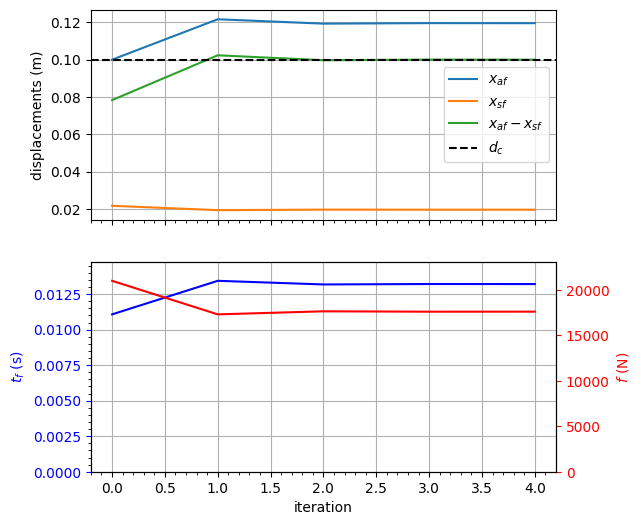

In [50]:
n_iter = 5

k_s_ = 1042430.8128   # N/m
m_s_ = 18.4025  # kg
c_s_ = 4206.1859 # Ns/m


brick_area = 0.84*0.30
F_ = 1753384.9570321564

T_ = 0.00026507390245736513

x_s_max_hf = 0.030513471603

m_a_ = 1 * brick_area * 0.0064 * 7850
print(f'{m_a_=} kg')

d_c_ = 0.10

phi_eq = 1.0

# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') 

# Call iterative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press_6mm4_12kg6.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))
full_iters_mean_press_6mm4_12kg6[-1].iter_opt_results.plot(d_c_)

### full_iter = 1

7.910814059661581
Loading: F_=4159064.565881 N, T_=0.000132 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000329 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.001325, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.015490, x_a_f_=0.115490, (x_a_f_-x_s_f_)=0.100000, t_f_=0.005831, f_=47248.802375, x_s_max_=0.015490
x_s_f_=0.016067, x_a_f_=0.116067, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006721, f_=40995.255209, x_s_max_=0.016067
x_s_f_=0.016086, x_a_f_=0.116086, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006754, f_=40794.322173, x_s_max_=0.016086
x_s_f_=0.016083, x_a_f_=0.116083, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006755, f_=40787.727768, x_s_max_=0.016083
f_eq_=69024.81976558256


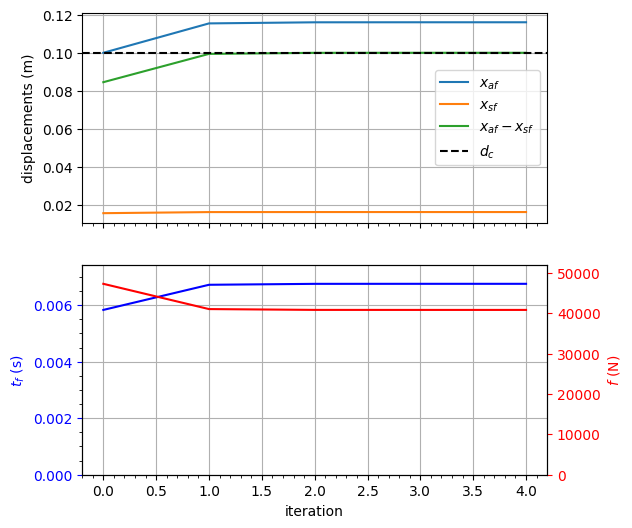

In [51]:
n_iter = 5

m_s_ = 25.0430  # kg
k_s_ = 1057961.3755 # N/m
c_s_ = 9703.7007  # Ns/m


brick_area = 0.84*0.3

T_ = 0.00013248656583963347  # s
F_ = 4159064.5658805156  # N

x_s_max_hf = 0.027915414910998734  # m

m_a_ = 7.910814059661581  # kg
print(m_a_)

d_c_ = 0.10

phi_eq = 1.692256412802042

# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') 

# Call iterative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press_6mm4_12kg6.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))
full_iters_mean_press_6mm4_12kg6[-1].iter_opt_results.plot(d_c_)


### full_iter = 2

7.875188630289099
Loading: F_=4091928.293511 N, T_=0.000129 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000264 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.001294, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.008364, x_a_f_=0.108364, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006037, f_=43841.339842, x_s_max_=0.008364
x_s_f_=0.008270, x_a_f_=0.108270, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006535, f_=40502.544476, x_s_max_=0.008270
x_s_f_=0.008271, x_a_f_=0.108271, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006529, f_=40537.108789, x_s_max_=0.008271
x_s_f_=0.008271, x_a_f_=0.108271, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006529, f_=40536.738296, x_s_max_=0.008271
f_eq_=74403.92916892163


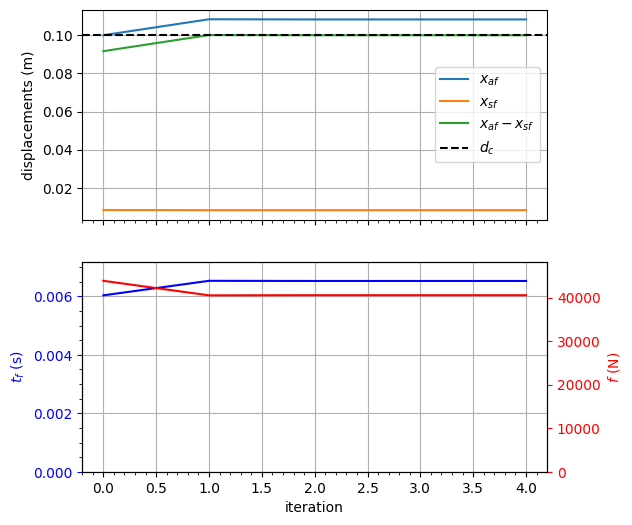

In [52]:
n_iter = 5

m_s_ = 31.7429  # kg
k_s_ = 3708614.2024 # N/m
c_s_ = 16819.0870  # Ns/m


brick_area = 0.84*0.3

T_ = 0.000129364752771688  # s
F_ = 4091928.2935113907  # N

x_s_max_hf = 0.011052982403273988  # m

m_a_ = 7.875188630289099  # kg
print(m_a_)

d_c_ = 0.10

phi_eq = 1.8354678011326788 

# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') 

# Call iterative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press_6mm4_12kg6.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))
full_iters_mean_press_6mm4_12kg6[-1].iter_opt_results.plot(d_c_)



### full_iter = 3

7.86854264964201
Loading: F_=4088314.700728 N, T_=0.000129 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000254 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.001294, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.007850, x_a_f_=0.107850, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006037, f_=43808.273784, x_s_max_=0.007850
x_s_f_=0.007629, x_a_f_=0.107629, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006504, f_=40662.150276, x_s_max_=0.007629
x_s_f_=0.007635, x_a_f_=0.107635, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006491, f_=40744.633673, x_s_max_=0.007635
x_s_f_=0.007635, x_a_f_=0.107635, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006491, f_=40742.413954, x_s_max_=0.007635
f_eq_=75242.62240668292


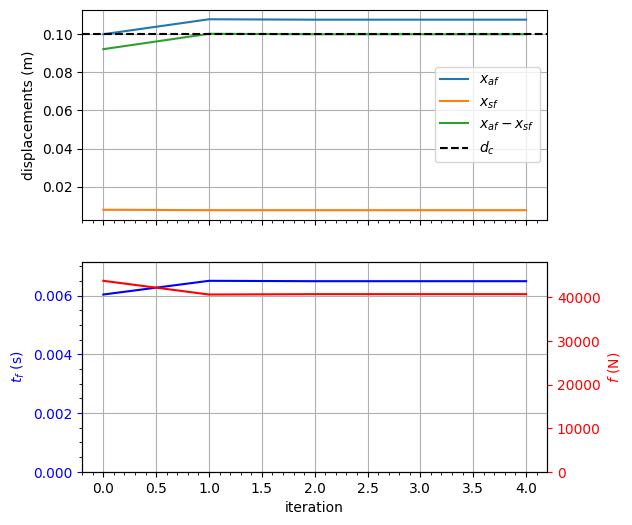

In [53]:
n_iter = 5

m_s_ = 31.3712  # kg
k_s_ = 5390376.5003 # N/m
c_s_ = 14778.7007  # Ns/m


brick_area = 0.84*0.3

T_ = 0.0001293757543819981  # s
F_ = 4088314.700727919  # N

x_s_max_hf = 0.01021358019399324  # m

m_a_ = 7.86854264964201  # kg
print(m_a_)

d_c_ = 0.10

phi_eq = 1.846781478932145 

# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') 

# Call iterative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press_6mm4_12kg6.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))
full_iters_mean_press_6mm4_12kg6[-1].iter_opt_results.plot(d_c_)



### full_iter = 4

7.86854264964201
Loading: F_=4088314.700728 N, T_=0.000129 s
Baseline: x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=0.000254 m
x_s_f_=0.000001, x_a_f_=0.100001, (x_a_f_-x_s_f_)=0.100000, t_f_=0.001294, f_=0.000001, x_s_max_=0.000000
x_s_f_=0.007850, x_a_f_=0.107850, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006037, f_=43808.273784, x_s_max_=0.007850
x_s_f_=0.007629, x_a_f_=0.107629, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006504, f_=40662.150276, x_s_max_=0.007629
x_s_f_=0.007635, x_a_f_=0.107635, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006491, f_=40744.633673, x_s_max_=0.007635
x_s_f_=0.007635, x_a_f_=0.107635, (x_a_f_-x_s_f_)=0.100000, t_f_=0.006491, f_=40742.413954, x_s_max_=0.007635
f_eq_=75242.62240668292


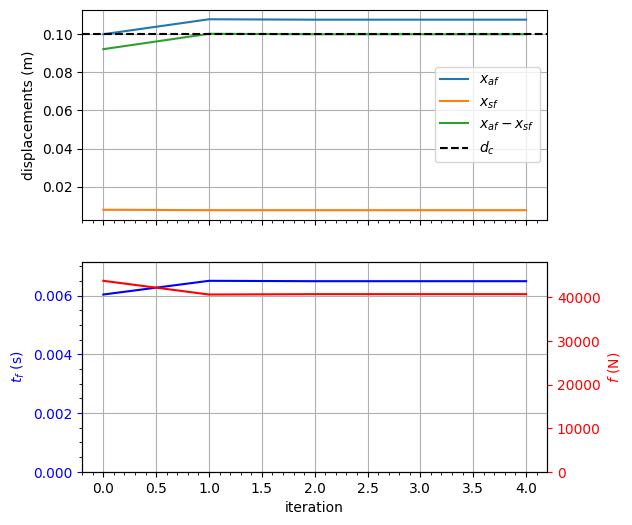

In [54]:
n_iter = 5

m_s_ = 31.3712  # kg
k_s_ = 5390376.5003 # N/m
c_s_ = 14778.7007  # Ns/m


brick_area = 0.84*0.3

T_ = 0.0001293757543819981  # s
F_ = 4088314.700727919  # N

x_s_max_hf = 0.01021358019399324  # m

m_a_ = 7.86854264964201  # kg
print(m_a_)

d_c_ = 0.10

phi_eq = 1.846781478932145 

# Assuming the loading is a triangle, duration must be halved because x_s_max assumes a rectangular pulse
print(f'Loading: {F_=:4f} N, {T_=:4f} s')
print(f'Baseline: {x_s_max(m_s_, c_s_, k_s_, T_/2, F_)=:4f} m') 

# Call iterative optimization
x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_)

# Convert to equivalent yield force
f_eq_ = phi_eq * f_list[-1]
print(f'{f_eq_=}')

full_iters_mean_press_6mm4_12kg6.append(FullIter(k_s_, m_s_, c_s_, brick_area, F_, T_, m_a_, d_c_, x_s_max_hf,
                                     IterOptResults(x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_), f_eq_))
full_iters_mean_press_6mm4_12kg6[-1].iter_opt_results.plot(d_c_)


### Convergence

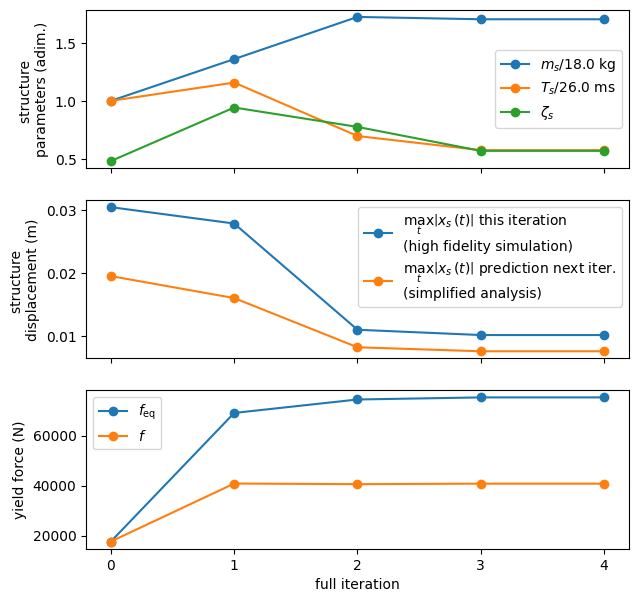

In [55]:
convergence_analysis(full_iters_mean_press_6mm4_12kg6)

# Apply analytic optimization to scenarios optimized by brute force

In [56]:
import pickle


# Brute force optimum results for comparison
with open('optimum_brute_force.pkl', 'rb') as file:
    (optimum_parameters, optimum_performance) = pickle.load(file=file)

# Analytically optimized results for comparison
with open('optimized.pkl', 'rb') as file:
    (optimized_parameters, optimized_performance) = pickle.load(file=file)

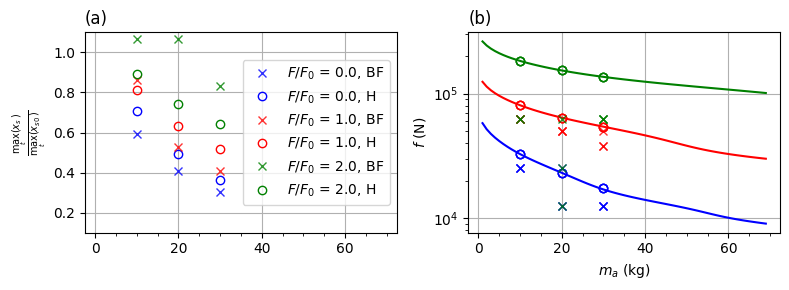

In [57]:
n_iter = 10

verbose = False
k_s_ = (57.6 * 2 / np.pi) * (2 * np.pi * 120) ** 2
m_s_ = 57.6 * 2 / np.pi
c_s_ = 0

fig, ax = plt.subplots(1, 2, figsize=(8,3), sharex='row')
plt.minorticks_on()

load_factor_values = [0.5, 1.0, 2.0]
colors_load_factor = {0.5: 'blue', 1.0: 'red', 2.0: 'green'}

for load_factor in load_factor_values:
    brick_area = 0.23*0.24
    F_ = 10e6*.294*brick_area * load_factor
    T_ = 5e-3
    m_a_values = range(1, 70, 1)

    # Assuming the loading is a triangle, duration must be halved because x_s_max asumes a rectangular pulse
    baseline = x_s_max(m_s_, c_s_, k_s_, T_/2, F_)

    performance, parameter_f = [], []
    for m_a_ in m_a_values:

        d_c_ = 0.05*.55

        if verbose:
            print(f'{m_a_=} kg')
            print(f'Loading: {F_=:4f} N, {T_=:4f} s')
            print(f'Baseline: {baseline=:4f} m')

        x_s_f_list, x_a_f_list, t_f_list, f_list, x_s_max_ = iter_opt(n_iter, k_s_, c_s_, m_s_, F_, T_, m_a_, d_c_, 
                                                                      verbose=verbose)

        # performance.append(x_s_max_/baseline)
        parameter_f.append(f_list[-1])

        try:
            if m_a_ == 30:
                label_bf = f'$F/F_0$ = {np.round(load_factor)}, BF'
                label_anal = f'$F/F_0$ = {np.round(load_factor)}, H'
            else:
                label_bf = label_anal = None

            ax[0].plot(m_a_, optimum_performance[load_factor][int(m_a_)], linestyle='none', marker='x', 
                       color=colors_load_factor[load_factor], label=label_bf, alpha=0.8)
            ax[1].plot(m_a_ * np.ones_like(optimum_parameters[load_factor][int(m_a_)][3:]), 
                       optimum_parameters[load_factor][int(m_a_)][3:], linestyle='none', marker='x', 
                       color=colors_load_factor[load_factor], label=label_bf, alpha=0.8, linewidth=10.)
            
            ax[0].plot(m_a_, optimized_performance[load_factor][int(m_a_)], linestyle='none', marker='o', 
                       color=colors_load_factor[load_factor], fillstyle='none', label=label_anal)
            ax[1].plot(m_a_ * np.ones_like(optimized_parameters[load_factor][int(m_a_)][3:]), 
                       optimized_parameters[load_factor][int(m_a_)][3:], linestyle='none', marker='o', 
                       color=colors_load_factor[load_factor], fillstyle='none', label=label_anal)

        except KeyError:
            pass

    # ax[0].plot(m_a_values, performance, color=colors_load_factor[load_factor], label=f'$F/F_0$={load_factor}')
    ax[1].plot(m_a_values, parameter_f, color=colors_load_factor[load_factor])

ax[0].set_ylabel(r'$\frac{\max_{t} (x_{s}) }{ \max_{t} (x_{s0}) } $')
ax[0].set_title('(a)', loc='left')
ax[0].legend(loc='right')
ax[0].set_ylim([0.1, 1.1])
# ax[0].set_yscale('log')
ax[0].set_title('(a)', loc='left')
ax[0].grid()

ax[1].set_xlabel(r'$m_a$ (kg)')
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$f$ (N)')
ax[1].set_title(r'(b)', loc='left')
# ax[1].legend(loc='right')
ax[1].grid()            

plt.minorticks_on()
plt.tight_layout()
fig.savefig('brute_force_vs_heuristic.pdf', bbox_inches='tight')
plt.show()